![title](presentation_header.png)

# <center>Wikidata, Wikipedia and chemistry</center> 

# <center>Lab meeting talk, 2018-09-02</center> 

# <center>Sebastian Burgstaller-Muehlbacher</center> 


<br>
<br>
<br>
<br>

# Great papers are out there!
<br>

![title](plx7922_abstract.png)

# A new inhibitor with substantial reduction in treatment sideffects for patients

<img src="plx7922_structure.png" alt="plx7922_structure.png" style="width: 350px;"/>


# Where is it? A chem information guessing game...

![title](plx7922_accession.png)

# How to determine if (open) data on that compound exists?

* String search for PLX7922, PLX-7922, PLX 7922 in
 * PubChem (no match)
 * ChemSpider (no match)
 * ChEMBL (no match)
 
# Enter into grief and despair mode here ...
<br>

# What else to try?

* Take the SMILES of Dabrafenib (CC(C)(C)C1=NC(C2=CC=CC(NS(=O)(=O)C3=C(F)C=CC=C3F)=C2F)=C(S1)C4=CC=NC(N)=N4)
* Modify it so it matches the new structure (CC(C)(C)C1=NC(C2=CC=CC(NS(=O)(=O)N(C)CC)=C2F)=C(S1)C3=CC=NC(N)=N3)
* Convert into InChI key (YBUJMZKTOUBMGW-UHFFFAOYSA-N)

Et voila! The SureChEMBL database returns a compound (SCHEMBL16266426)

# But it's not over yet!

SureChEMLB has no association of the label PLX7922 with the compound I found.
* The only thing returned is a United States patent ID (US2014357612)
* The whole, gigantic patent document does not mention the label PLX7922

The only resource which has the association of label and structure is Reaxys, Elseviers gigantic, locked in, ancient, chemistry database. The Beilstein number is: 28127913

* Through Scripps library, we have access to this database.
* Other researchers/people are completely locked out. 
* Subscription to Reaxys/Beilstein is costly.
* Open data is required to link those data in the semantic web and for annotation of papers.
* These kind of data is required to be open, if we want to build open knowledge networks.

# Conclusion and solution: This compound should be in Wikidata

Why?
* Wikidata is completely open (CC0)
* Wikidata is searchable, by text or SPARQL endpoint, etc.
* Wikidata has now a large set of chemical compound identifer and chemical compound property properties (~ 65)
* Wikidata already hosts ~ 24,000 chemical compounds


# Current status of Wikidata chemical data -  an overview

In [1]:
import urllib
import pandas as pd
import numpy as np


wd_chem_data = pd.read_csv('wd_core_chem_data_concatenated-08-29-2016.csv', low_memory=False, index_col=0, 
                           dtype={'drugbank': np.str, 'iuphar': np.str})
wd_chem_data['article'] = wd_chem_data.loc[wd_chem_data['article'].map(
                lambda x: pd.notnull(x)), 'article'].map(lambda x: urllib.parse.unquote(x))


wp_chem_data = pd.read_csv('wp_chem_data_2016-09-01.csv', low_memory=False, index_col=0, 
                          dtype={'pageid': np.str})

wp_chem_data['DrugBank'] = wp_chem_data.loc[wp_chem_data['DrugBank'].map(
                lambda x: pd.notnull(x)), 'DrugBank'].map(lambda x: x[2:])

wp_chem_data['ChEMBL'] = wp_chem_data.loc[wp_chem_data['ChEMBL'].map(
                lambda x: pd.notnull(x)), 'ChEMBL'].map(lambda x: '|'.join(['CHEMBL' + y for y in x.split('|')]))

# What data on chemical compounds is in Wikidata

In [56]:
wd_chem_data.count()

cmpnd               24810
article             16391
mass                  637
chemSpider          11463
pubchem_cid         16909
unii                11826
mesh_id               927
kegg_id              4065
mesh_code               3
chebi                4464
drugbank             2682
chembl               5461
iuphar               1033
cas                 19692
csmiles             15636
inchi               14471
inchi_key           14946
chemical_formula    19475
atc_code             1709
ismiles                16
dtype: int64

# What data on chemical compounds is in the English Wikipedia?

In [33]:
wp_chem_data.count()

page_title          16499
pageid              16499
SystematicName        600
OtherNames           5206
synonyms             1091
IUPHAR_ligand        2013
CASNo                7573
CAS_number           5629
UNII                 6151
SMILES               8452
KEGG                 3908
ChEMBL               6112
ChemSpiderID        13367
DrugBank             2108
PubChem             11730
StdInChI            11503
StdInChIKey         11724
InChI                6357
InChIKey             5936
ATC_code             3813
molecular_weight     5633
dtype: int64

# Comparison of chem data in Wikidata and Wikipedia

In [2]:
bool_df = pd.DataFrame(columns=wd_chem_data.columns, index=wd_chem_data.index)
bool_df.fillna(method='backfill')
bool_df['cmpnd'] = wd_chem_data['cmpnd']
bool_df['article'] = wd_chem_data['article']
bool_df.head()


,cmpnd,article,mass,chemSpider,pubchem_cid,unii,mesh_id,kegg_id,mesh_code,chebi,drugbank,chembl,iuphar,cas,csmiles,inchi,inchi_key,chemical_formula,atc_code,ismiles
0,http://www.wikidata.org/entity/Q153,https://en.wikipedia.org/wiki/Ethanol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://www.wikidata.org/entity/Q1002152,https://en.wikipedia.org/wiki/Fluoroiodomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://www.wikidata.org/entity/Q1002155,https://en.wikipedia.org/wiki/Fluorosulfonate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://www.wikidata.org/entity/Q1002165,https://en.wikipedia.org/wiki/Fluticasone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://www.wikidata.org/entity/Q1003185,https://en.wikipedia.org/wiki/Fosfestrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for count, data in wd_chem_data.iterrows():    
    if pd.isnull(data['article']):
        continue
    
    compound_name = data['article'].split('/')[-1]
    comp_cols = [
        'mass',
        'chemSpider',
        'pubchem_cid',
        'unii',
        'kegg_id',
        'drugbank',
        'chembl',
        'iuphar',
        'cas',
        'csmiles',
        'inchi',
        'inchi_key',
        'atc_code',
    ]
    wd_data = [set(data[col].split('|')) if pd.notnull(data[col]) else set([np.NaN]) for col in comp_cols]
#     print(wd_data)    
        
    comp_cols_1 = [
        'molecular_weight',
        'ChemSpiderID',
        'PubChem',
        'UNII',
        'KEGG',
        'DrugBank',
        'ChEMBL',
        'IUPHAR_ligand',
        'cas',
        'SMILES',
        'StdInChI',
        'StdInChIKey',
        'ATC_code',
    ]
    
    try:
        c, tmp_data = next(wp_chem_data.loc[wp_chem_data['page_title'].values == compound_name, 
                                            :].iterrows())
    except StopIteration:
        continue
        
    tmp_data['cas'] = '|'.join([x for x in [tmp_data['CASNo'], tmp_data['CAS_number']] if pd.notnull(x)])
    
    wp_data = [set(tmp_data[col].split('|')) if pd.notnull(tmp_data[col]) 
               else set([np.NaN]) for col in comp_cols_1]
    
    for cc, d in enumerate(wd_data):
        wd = {x for x in d if pd.notnull(x)}        
        wp = {x for x in wp_data[cc] if pd.notnull(x)}

        if len(wd.intersection(wp)) >= 1 and (len(wd) >= 1 or len(wp) >= 1):
            bool_df.loc[count, comp_cols[cc]] = True
            
        elif len(wd.intersection(wp)) < 1 and (len(wd) >= 1 or len(wp) >= 1):
            bool_df.loc[count, comp_cols[cc]] = False
    
    if count % 1000 == 0:
        print(count)
        
# bool_df.head(n=50)

0
2000
3000
8000
9000
10000
11000
13000
14000
16000
18000
19000
20000
21000
22000
23000
24000


In [5]:
bool_df.describe()


,cmpnd,article,mass,chemSpider,pubchem_cid,unii,mesh_id,kegg_id,mesh_code,chebi,drugbank,chembl,iuphar,cas,csmiles,inchi,inchi_key,chemical_formula,atc_code,ismiles
count,24810,16391,5768,13243,13590,10181,0.0,4210,0.0,0.0,2586,6203,2098,15459,13976,13655,13785,0.0,3526,0.0
unique,24810,16391,1,2,2,2,0.0,2,0.0,0.0,2,2,2,2,2,2,2,0.0,2,0.0
top,http://www.wikidata.org/entity/Q414932,https://en.wikipedia.org/wiki/Dichlorine trioxide,False,True,True,True,NaN,True,NaN,NaN,True,True,False,True,False,True,True,NaN,False,NaN
freq,1,1,5768,10145,10400,5375,NaN,2803,NaN,NaN,1989,4815,1209,12002,8295,8524,8907,NaN,1916,NaN


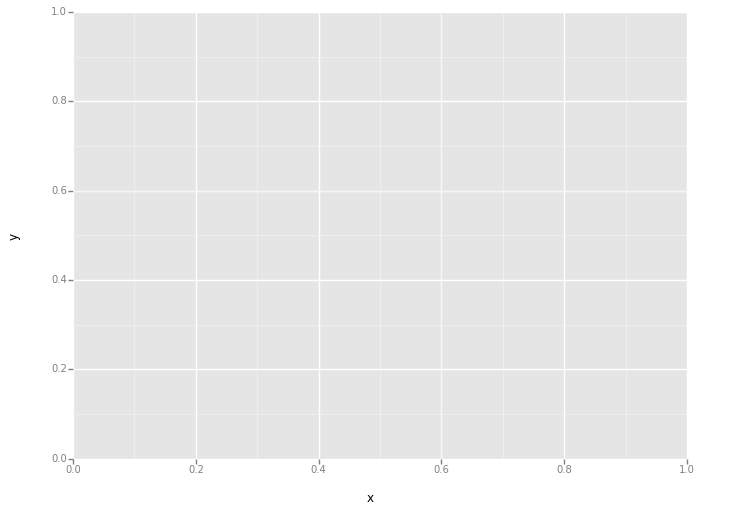

<ggplot: (-9223363292482168053)>

In [60]:
df = pd.DataFrame({"x" : ["match", "no match"], "y": [879,1209]})
plot = ggplot(aes(x="x",y="y"), data=df) + geom_bar(stat='identity')
plot

In [77]:
bool_df.to_csv('bool_df.csv')

In [63]:
bool_df['drugbank'].dropna().loc[bool_df['drugbank'] == False].count()

597

In [4]:
for count, x in bool_df.iterrows():
    t_count = [1 for k, v in x.items() if v == True]
    f_count = [1 for k, v in x.items() if v == False]
    na_count = [1 for k, v in x.items() if pd.isnull(v)]
#     print(sum(t_count), sum(f_count), sum(na_count))
    bool_df.loc[count, 't_count'] = np.NaN if sum(t_count) == 0 and sum(f_count) == 0 else sum(t_count)
    bool_df.loc[count, 'f_count'] = np.NaN if sum(t_count) == 0 and sum(f_count) == 0 else sum(f_count)
    bool_df.loc[count, 'na_count'] = sum(na_count)
    

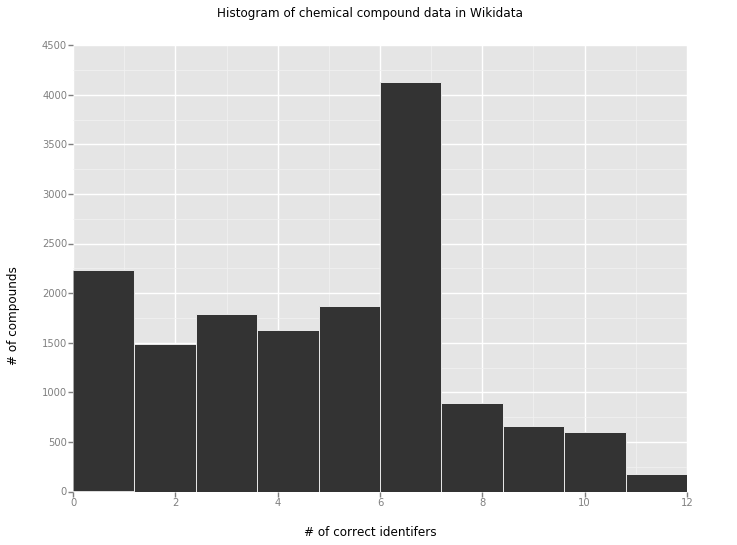

<ggplot: (8744373389260)>

In [21]:
from ggplot import *
p = ggplot(aes(x='t_count'), data=bool_df)
p + geom_histogram(binwidth=1) + ggtitle('Histogram of chemical compound data in Wikidata') + xlab('# of correct identifers') + ylab('# of compounds')


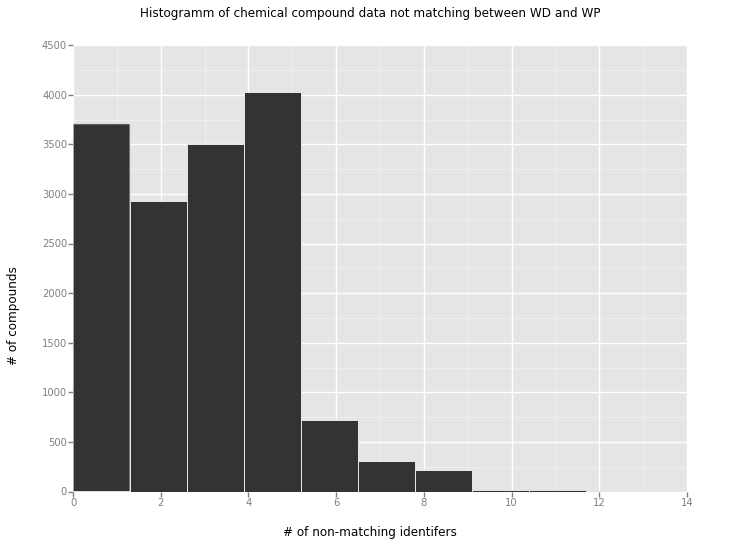

<ggplot: (-9223363292481196505)>

In [23]:
p2 = ggplot(aes(x='f_count'), data=bool_df)
p2 + geom_histogram(binwidth=1) + ggtitle('Histogramm of chemical compound data not matching between WD and WP') + xlab('# of non-matching identifers') + ylab('# of compounds')

In [80]:
bool_df.to_csv('bool_df_w_counts.csv')

# How do FDA approved drugs in Wikidata perform?

In [15]:
import requests
import sys
import pandas as pd

sys.path.append('/home/sebastian/PycharmProjects/restructure/ProteinBoxBot_Core/')
import PBB_Core
import PBB_login


query = '''
SELECT * WHERE {
    ?compound wdt:P31 wd:Q12140 .
}
'''

results = PBB_Core.WDItemEngine.execute_sparql_query(query)
pharm_compounds = pd.DataFrame(columns=bool_df.columns)

for count, cmpnd in enumerate(results['results']['bindings']):
    entity = cmpnd['compound']['value']
    
    if entity in bool_df['cmpnd'].values:
        pharm_compounds = pharm_compounds.append(bool_df.loc[bool_df['cmpnd'].values == entity, :])

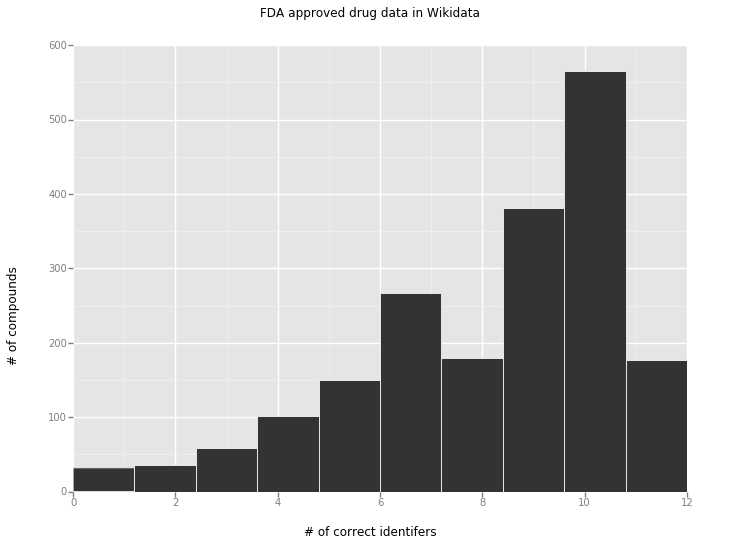

<ggplot: (8744367988151)>

In [42]:
p = ggplot(aes(x='t_count'), data=pharm_compounds)
p + geom_histogram(binwidth=1) + ggtitle('FDA approved drug data in Wikidata') + xlab('# of correct identifers') + ylab('# of compounds')

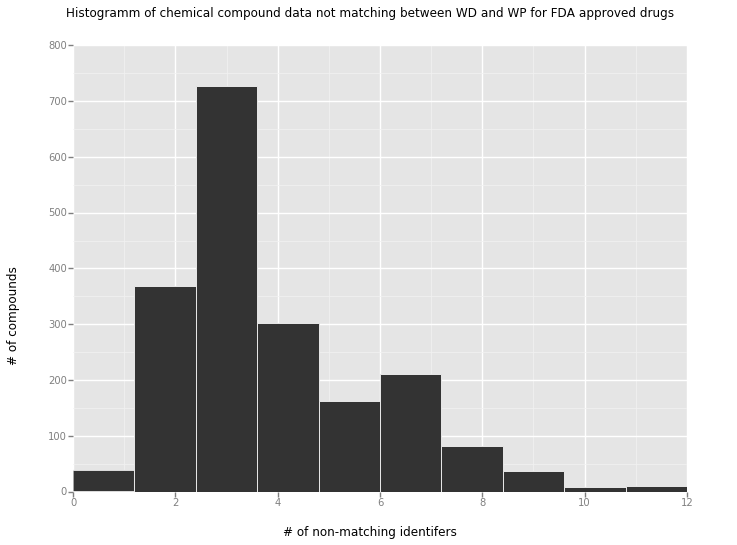

<ggplot: (8744368478833)>

In [24]:
p2 = ggplot(aes(x='f_count'), data=pharm_compounds)
p2 + geom_histogram(binwidth=1) + ggtitle('Histogramm of chemical compound data not matching between WD and WP for FDA approved drugs') + xlab('# of non-matching identifers') + ylab('# of compounds')

# I want PLX7922 in Wikidata:

In [52]:
import sys
import pandas as pd
import pprint

sys.path.append('/home/sebastian/PycharmProjects/restructure/ProteinBoxBot_Core/')
sys.path.append('/home/sebastian/PycharmProjects/cdk_pywrapper/')
import PBB_Core
import PBB_login
import cdk_pywrapper

login_obj = PBB_login.WDLogin(user='sebotic', pwd='')

plx7922_smiles = 'CC(C)(C)C1=NC(C2=CC=CC(NS(=O)(=O)N(C)(CC))=C2F)=C(S1)C4=CC=NC(N)=N4'
cmpnd = cdk_pywrapper.Compound(compound_string=plx7922_smiles, identifier_type='smiles')

refs = [[PBB_Core.WDExternalID(value='26466569', prop_nr='P698', is_reference=True)]]

data = [
        PBB_Core.WDItemID(value='Q11173', prop_nr='P31', references=refs), # instance of chemical compound
        PBB_Core.WDString(value=cmpnd.get_smiles(), prop_nr='P233', references=refs), # canonical, kekulized SMI
        PBB_Core.WDString(value=cmpnd.get_inchi_key(), prop_nr='P235', references=refs), # InChI key
        PBB_Core.WDString(value=cmpnd.get_inchi(), prop_nr='P234', references=refs), # InChI
        PBB_Core.WDExternalID(value='SCHEMBL16266426', prop_nr='P2877', references=refs)
    ]

for x in data:
    print(x.get_value())
    

Successully logged id as Sebotic
11173
CC(C)(C)C1=NC(C2=CC=CC(NS(=O)(=O)N(C)CC)=C2F)=C(S1)C3=CC=NC(N)=N3
YBUJMZKTOUBMGW-UHFFFAOYSA-N
InChI=1S/C20H25FN6O2S2/c1-6-27(5)31(28,29)26-13-9-7-8-12(15(13)21)16-17(14-10-11-23-19(22)24-14)30-18(25-16)20(2,3)4/h7-11,26H,6H2,1-5H3,(H2,22,23,24)
SCHEMBL16266426


In [53]:
wd_item = PBB_Core.WDItemEngine(item_name='PLX7922', domain='drugs', data=data, append_value=['P31'])
wd_item.set_label('PLX7922')
wd_item.set_description('chemical compound')

pprint.pprint(wd_item.get_wd_json_representation())

{'claims': {'P233': [{'mainsnak': {'datatype': 'string',
                                   'datavalue': {'type': 'string',
                                                 'value': 'CC(C)(C)C1=NC(C2=CC=CC(NS(=O)(=O)N(C)CC)=C2F)=C(S1)C3=CC=NC(N)=N3'},
                                   'property': 'P233',
                                   'snaktype': 'value'},
                      'qualifiers': {},
                      'qualifiers-order': [],
                      'rank': 'normal',
                      'references': [{'snaks': {'P698': [{'datatype': 'external-id',
                                                          'datavalue': {'type': 'string',
                                                                        'value': '26466569'},
                                                          'property': 'P698',
                                                          'snaktype': 'value'}]},
                                      'snaks-order': ['P698']}],
                

In [54]:
qid = wd_item.write(login=login_obj)

'https://www.wikidata.org/wiki/{}'.format(qid)

'https://www.wikidata.org/wiki/Q26763610'

# Summary

* Thousands of chemical compounds are in Wikidata
* Apart from FDA approved drugs, most of them need improvement because
 * There is a disconcordance in the structure to identifier mapping
 * Either structure or identifiers are missing or both

* How to solve that:
 * Consistency check SMILES with InChI and InChI key using cdk_pywrapper
 * Consistency check with external databases (challening)
 
* Jupyter notebooks can be very useful in interactive chemoinformatics data analysis and retrieval of data from Wikidata

In [112]:
ccc = 0
for x in wp_chem_data['page_title']:
    link = 'https://en.wikipedia.org/wiki/' + x
    
    if link not in wd_chem_data['article'].values:
        print(link)
        ccc += 1
print(ccc)

https://en.wikipedia.org/wiki/BCG vaccine
https://en.wikipedia.org/wiki/Botulinum toxin
https://en.wikipedia.org/wiki/Laudanum
https://en.wikipedia.org/wiki/MMR vaccine
https://en.wikipedia.org/wiki/Polio vaccine
https://en.wikipedia.org/wiki/Glucagon
https://en.wikipedia.org/wiki/Dexbrompheniramine/pseudoephedrine
https://en.wikipedia.org/wiki/Microbicides for sexually transmitted diseases
https://en.wikipedia.org/wiki/Alpha-1 antitrypsin
https://en.wikipedia.org/wiki/Hydrocortisone
https://en.wikipedia.org/wiki/Anti-thymocyte globulin
https://en.wikipedia.org/wiki/Fenfluramine/phentermine
https://en.wikipedia.org/wiki/Oxycodone/aspirin
https://en.wikipedia.org/wiki/Adderall
https://en.wikipedia.org/wiki/DPT vaccine
https://en.wikipedia.org/wiki/Neuropeptide Y
https://en.wikipedia.org/wiki/Nicotine replacement therapy
https://en.wikipedia.org/wiki/Influenza vaccine
https://en.wikipedia.org/wiki/Live attenuated influenza vaccine
https://en.wikipedia.org/wiki/MeNZB
https://en.wikipedia.